In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
from sklearn import preprocessing
from scipy.stats import spearmanr
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [28]:
#the file that contains all issues and all fields
allBounty = pd.read_csv("C:\\Users\\Ploy Oh\\Downloads\\csvFile\\gitcoin_dataset_5.csv")

#the file that contains fields from 'activities' array e.g. activity_type, duration_create_to_done
activity_coll = pd.read_csv("C:\\Users\\Ploy Oh\\Downloads\\csvFile\\activities_collection_3.csv")

#the file that contains '# of times bounty increased' from 'activities' array
bounty_changed = pd.read_csv("C:\\Users\\Ploy Oh\\Downloads\\csvFile\\changedBounty2.csv")

In [29]:
#Cleansing data

activity_coll.drop('duration_worker_applied_to_worker_approved',axis='columns', inplace=True)

#fill-in 'numerical values' with their median
allBounty['value_in_eth'].fillna(float(allBounty['value_in_eth'].median()), inplace = True)
allBounty['value_in_usdt_now'].fillna(float(allBounty['value_in_usdt_now'].median()), inplace = True)
allBounty['value_in_usdt'].fillna(float(allBounty['value_in_usdt'].median()), inplace = True)
allBounty['token_value_in_usdt'].fillna(float(allBounty['token_value_in_usdt'].median()), inplace = True)

#fill-in 'categorical values' with "NA" (except for github_issue_number)
allBounty['title'].fillna("NA", inplace = True)
allBounty['funder_last_messaged_on'].fillna("NA", inplace = True)
allBounty['is_reserved'].fillna("NA", inplace = True)
allBounty['canceled_bounty_reason'].fillna("NA", inplace = True) 
allBounty['reserved_for_user_handle'].fillna("NA", inplace = True)
allBounty['attached_job_description'].fillna("NA", inplace = True)
allBounty['canceled_on'].fillna("NA", inplace = True)
allBounty['funding_organisation'].fillna("NA", inplace = True) 
allBounty['featuring_date'].fillna("NA", inplace = True)
allBounty['fulfillment_accepted_on'].fillna("NA", inplace = True)
allBounty['fulfillment_submitted_on'].fillna("NA", inplace = True)
allBounty['fulfillment_started_on'].fillna("NA", inplace = True)
allBounty['keywords'].fillna("NA", inplace = True)
allBounty['bounty_owner_name'].fillna("NA", inplace = True)
allBounty['github_issue_state'].fillna("NA", inplace = True)
allBounty['bounty_owner_github_username'].fillna("NA", inplace = True)
allBounty['bounty_owner_email'].fillna("NA", inplace = True)
allBounty['github_issue_number'].fillna(0, inplace = True)
allBounty['github_repo_name'].fillna("NA", inplace = True)
allBounty['org_name'].fillna("NA", inplace = True)
allBounty['github_org_name'].fillna("NA", inplace = True)

allBounty.loc[allBounty['bounty_type'] == "0", 'bounty_type'] = "Other"
allBounty.loc[allBounty['bounty_type'] == "Andere", 'bounty_type'] = "Other"
allBounty.loc[allBounty['bounty_type'] == "Funkcja", 'bounty_type'] = "Other"
allBounty.loc[allBounty['bounty_type'] == "æ¹å", 'bounty_type'] = "Other"
allBounty['bounty_type'].fillna("NA", inplace = True)

allBounty.loc[allBounty['experience_level'] == "0", 'experience_level'] = "Other"
allBounty.loc[allBounty['experience_level'] == "Mittlere", 'experience_level'] = "Intermediate"
allBounty.loc[allBounty['experience_level'] == "åå¿è", 'experience_level'] = "Other"
allBounty.loc[allBounty['experience_level'] == "Pośredni", 'experience_level'] = "Intermediate"
allBounty['experience_level'].fillna("NA", inplace = True)

allBounty.loc[allBounty['project_length'] == "0", 'project_length'] = "Unknown"
allBounty.loc[allBounty['project_length'] == "Tage", 'project_length'] = "Days"
allBounty.loc[allBounty['project_length'] == "Miesięcy", 'project_length'] = "Months"
allBounty['project_length'].fillna("NA", inplace = True)

In [30]:
#merge two dataframe together
outer_merged = pd.merge(allBounty, activity_coll, how="outer", on=["pk"])
outer_merged = pd.merge(outer_merged, bounty_changed, how="outer", on=["pk"])

outer_merged['increased_bounty_times'].fillna(0, inplace = True)
outer_merged['changed_bounty_value'].fillna(0, inplace = True)

outer_merged['firstAct_activity_type'].fillna("NA", inplace = True)
outer_merged['lastAct_activity_type'].fillna("NA", inplace = True)

outer_merged['duration_create_to_done'].fillna(0, inplace = True)
outer_merged['duration_create_to_firstAct'].fillna(0, inplace = True)
outer_merged['duration_create_to_killed'].fillna(0, inplace = True)
outer_merged['duration_create_to_lastAct'].fillna(0, inplace = True)
outer_merged['duration_create_to_new_bounty'].fillna(0, inplace = True)
outer_merged['duration_create_to_start'].fillna(0, inplace = True)
outer_merged['duration_create_to_stop'].fillna(0, inplace = True)
outer_merged['duration_create_to_submitted'].fillna(0, inplace = True)
outer_merged['duration_create_to_worker_applied'].fillna(0, inplace = True)
outer_merged['number_of_user_in_activities'].fillna(0, inplace = True)

In [31]:
#change cathegory to number

#experience_level
outer_merged['experience_level_code'] = outer_merged['experience_level']
find_replace = {"experience_level_code" : {"NA": 0, "Other": 0, "Beginner": 1, "Intermediate": 2, "Advanced": 3}}
outer_merged.replace(find_replace, inplace=True)

#project_type
outer_merged['project_type_code'] = outer_merged['project_type']
find_replace = {"project_type_code" : {"traditional": 1, "contest": 2, "cooperative": 3}}
outer_merged.replace(find_replace, inplace=True)

#project_length
outer_merged['project_length_code'] = outer_merged['project_length']
find_replace = {"project_length_code" : {"NA": 0, "Unknown": 0, "Hours": 1, "Days": 24, "Weeks": 168, "Months": 720}} #in hours
outer_merged.replace(find_replace, inplace=True)

In [32]:
#normalization
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler() 
column_names_to_normalize = ['changed_bounty_value','github_comments','increased_bounty_times','description_length','duration_create_to_expire','number_of_activities','number_of_fulfillments','number_of_interests','token_value_in_usdt','value_in_eth','value_in_token','value_in_usdt','value_in_usdt_now','duration_create_to_done','duration_create_to_firstAct','duration_create_to_killed','duration_create_to_lastAct','duration_create_to_new_bounty','duration_create_to_start','duration_create_to_stop','duration_create_to_submitted','duration_create_to_worker_applied','number_of_user_in_activities']
x = outer_merged[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
outer_merged_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = outer_merged.index)
outer_merged[column_names_to_normalize] = outer_merged_temp

In [33]:
columns_temp = ['duration_create_to_expire','value_in_eth','value_in_token','value_in_usdt','value_in_usdt_now',
                'project_length_code','experience_level_code','project_type_code',
                'github_comments','number_of_activities','number_of_fulfillments','number_of_interests',
                'description_length','duration_create_to_done','duration_create_to_firstAct','duration_create_to_lastAct',
                'duration_create_to_submitted','duration_create_to_killed','duration_create_to_new_bounty',
                'duration_create_to_start','duration_create_to_stop','duration_create_to_worker_applied',
                'number_of_user_in_activities','changed_bounty_value','increased_bounty_times']

#note: No 'bounty_type','token_name','firstAct_activity_type','lastAct_activity_type' compared to features used in random forest

[Text(0.5, 0, 'admin_override_suspend_auto_approval'),
 Text(1.5, 0, 'can_remarket'),
 Text(2.5, 0, 'can_submit_after_expiration_date'),
 Text(3.5, 0, 'current_bounty'),
 Text(4.5, 0, 'description_length'),
 Text(5.5, 0, 'duration_create_to_expire'),
 Text(6.5, 0, 'github_comments'),
 Text(7.5, 0, 'github_issue_number'),
 Text(8.5, 0, 'is_featured'),
 Text(9.5, 0, 'is_issue_closed'),
 Text(10.5, 0, 'is_open'),
 Text(11.5, 0, 'is_paid'),
 Text(12.5, 0, 'is_success'),
 Text(13.5, 0, 'needs_review'),
 Text(14.5, 0, 'number_of_activities'),
 Text(15.5, 0, 'number_of_fulfillments'),
 Text(16.5, 0, 'number_of_interests'),
 Text(17.5, 0, 'pk'),
 Text(18.5, 0, 'standard_bounties_id'),
 Text(19.5, 0, 'token_value_in_usdt'),
 Text(20.5, 0, 'value_in_eth'),
 Text(21.5, 0, 'value_in_token'),
 Text(22.5, 0, 'value_in_usdt'),
 Text(23.5, 0, 'value_in_usdt_now'),
 Text(24.5, 0, 'value_true'),
 Text(25.5, 0, 'duration_create_to_done'),
 Text(26.5, 0, 'duration_create_to_firstAct'),
 Text(27.5, 0, 'dur

[Text(0, 0.5, 'admin_override_suspend_auto_approval'),
 Text(0, 1.5, 'can_remarket'),
 Text(0, 2.5, 'can_submit_after_expiration_date'),
 Text(0, 3.5, 'current_bounty'),
 Text(0, 4.5, 'description_length'),
 Text(0, 5.5, 'duration_create_to_expire'),
 Text(0, 6.5, 'github_comments'),
 Text(0, 7.5, 'github_issue_number'),
 Text(0, 8.5, 'is_featured'),
 Text(0, 9.5, 'is_issue_closed'),
 Text(0, 10.5, 'is_open'),
 Text(0, 11.5, 'is_paid'),
 Text(0, 12.5, 'is_success'),
 Text(0, 13.5, 'needs_review'),
 Text(0, 14.5, 'number_of_activities'),
 Text(0, 15.5, 'number_of_fulfillments'),
 Text(0, 16.5, 'number_of_interests'),
 Text(0, 17.5, 'pk'),
 Text(0, 18.5, 'standard_bounties_id'),
 Text(0, 19.5, 'token_value_in_usdt'),
 Text(0, 20.5, 'value_in_eth'),
 Text(0, 21.5, 'value_in_token'),
 Text(0, 22.5, 'value_in_usdt'),
 Text(0, 23.5, 'value_in_usdt_now'),
 Text(0, 24.5, 'value_true'),
 Text(0, 25.5, 'duration_create_to_done'),
 Text(0, 26.5, 'duration_create_to_firstAct'),
 Text(0, 27.5, 'dur

Text(0.5, 1.0, 'Correlation Heatmap - all - spearman')

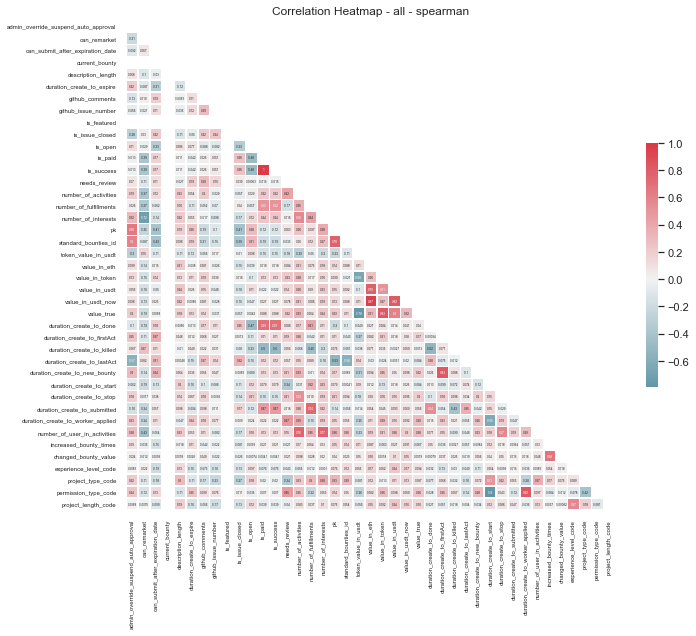

In [34]:
#Heatmap: spearman all features

sns.set(style="white")
# Create a covariance matrix
corr = outer_merged.corr(method = 'spearman')
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,linewidth=.5, cbar_kws={'shrink': .5},annot=True,annot_kws={"size": 3})
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 6)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 6)

ax.set_title('Correlation Heatmap - all - spearman')
plt.savefig('C:/Users/Ploy Oh/Downloads/csvFile/pictures/spearman_correlation_all.png', dpi = 300)

[Text(0.5, 0, 'duration_create_to_expire'),
 Text(1.5, 0, 'value_in_eth'),
 Text(2.5, 0, 'value_in_token'),
 Text(3.5, 0, 'value_in_usdt'),
 Text(4.5, 0, 'value_in_usdt_now'),
 Text(5.5, 0, 'project_length_code'),
 Text(6.5, 0, 'experience_level_code'),
 Text(7.5, 0, 'project_type_code'),
 Text(8.5, 0, 'github_comments'),
 Text(9.5, 0, 'number_of_activities'),
 Text(10.5, 0, 'number_of_fulfillments'),
 Text(11.5, 0, 'number_of_interests'),
 Text(12.5, 0, 'description_length'),
 Text(13.5, 0, 'duration_create_to_done'),
 Text(14.5, 0, 'duration_create_to_firstAct'),
 Text(15.5, 0, 'duration_create_to_lastAct'),
 Text(16.5, 0, 'duration_create_to_submitted'),
 Text(17.5, 0, 'duration_create_to_killed'),
 Text(18.5, 0, 'duration_create_to_new_bounty'),
 Text(19.5, 0, 'duration_create_to_start'),
 Text(20.5, 0, 'duration_create_to_stop'),
 Text(21.5, 0, 'duration_create_to_worker_applied'),
 Text(22.5, 0, 'number_of_user_in_activities'),
 Text(23.5, 0, 'changed_bounty_value'),
 Text(24.5, 

[Text(0, 0.5, 'duration_create_to_expire'),
 Text(0, 1.5, 'value_in_eth'),
 Text(0, 2.5, 'value_in_token'),
 Text(0, 3.5, 'value_in_usdt'),
 Text(0, 4.5, 'value_in_usdt_now'),
 Text(0, 5.5, 'project_length_code'),
 Text(0, 6.5, 'experience_level_code'),
 Text(0, 7.5, 'project_type_code'),
 Text(0, 8.5, 'github_comments'),
 Text(0, 9.5, 'number_of_activities'),
 Text(0, 10.5, 'number_of_fulfillments'),
 Text(0, 11.5, 'number_of_interests'),
 Text(0, 12.5, 'description_length'),
 Text(0, 13.5, 'duration_create_to_done'),
 Text(0, 14.5, 'duration_create_to_firstAct'),
 Text(0, 15.5, 'duration_create_to_lastAct'),
 Text(0, 16.5, 'duration_create_to_submitted'),
 Text(0, 17.5, 'duration_create_to_killed'),
 Text(0, 18.5, 'duration_create_to_new_bounty'),
 Text(0, 19.5, 'duration_create_to_start'),
 Text(0, 20.5, 'duration_create_to_stop'),
 Text(0, 21.5, 'duration_create_to_worker_applied'),
 Text(0, 22.5, 'number_of_user_in_activities'),
 Text(0, 23.5, 'changed_bounty_value'),
 Text(0, 24.

Text(0.5, 1.0, 'Correlation Heatmap - spearman')

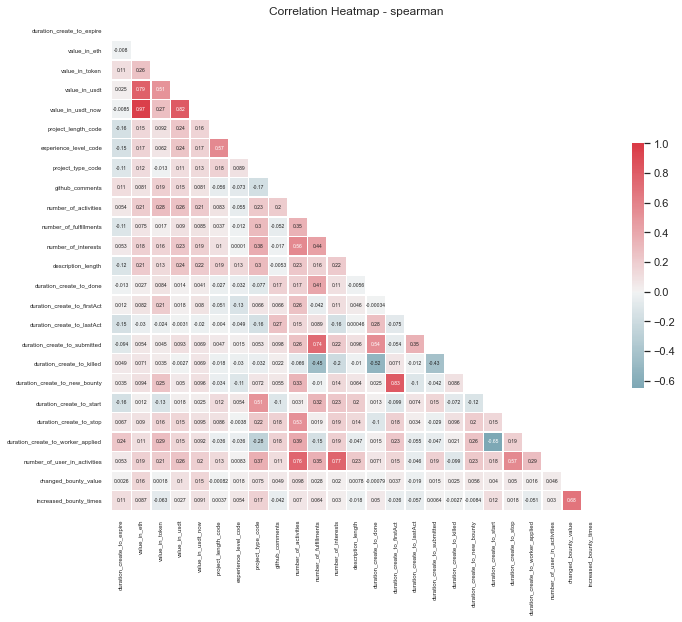

In [35]:
#Heatmap: spearman used feature in columns_temp

sns.set(style="white")
# Create a covariance matrix
corr = outer_merged[columns_temp].corr(method = 'spearman')
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,linewidth=.5, cbar_kws={'shrink': .5},annot=True,annot_kws={"size": 5})
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 6)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 6)

ax.set_title('Correlation Heatmap - spearman')
plt.savefig('C:/Users/Ploy Oh/Downloads/csvFile/pictures/spearman_correlation.png', dpi = 300)

In [36]:
outer_merged[columns_temp].corr(method = 'spearman')

,duration_create_to_expire,value_in_eth,value_in_token,value_in_usdt,value_in_usdt_now,project_length_code,experience_level_code,project_type_code,github_comments,number_of_activities,...,duration_create_to_lastAct,duration_create_to_submitted,duration_create_to_killed,duration_create_to_new_bounty,duration_create_to_start,duration_create_to_stop,duration_create_to_worker_applied,number_of_user_in_activities,changed_bounty_value,increased_bounty_times
duration_create_to_expire,1.000000,-0.007992,0.109307,0.024997,-0.008524,-0.157002,-0.150176,-0.106608,0.113403,0.054174,...,-0.150432,-0.094447,0.049076,0.034819,-0.157562,0.066942,0.235162,0.053143,0.002560,0.114110
value_in_eth,-0.007992,1.000000,0.259651,0.792184,0.969528,0.146496,0.168724,0.121344,0.081482,0.205759,...,-0.030360,0.054382,0.071357,0.094023,0.012485,0.089630,0.107748,0.187457,0.155156,0.087215
value_in_token,0.109307,0.259651,1.000000,0.510221,0.273325,0.091913,0.061895,-0.013464,0.191331,0.281761,...,-0.024198,0.045188,0.034998,0.248178,-0.130465,0.158055,0.287293,0.205235,0.001819,-0.063440
value_in_usdt,0.024997,0.792184,0.510221,1.000000,0.824428,0.235658,0.241324,0.112409,0.148741,0.260249,...,-0.003100,0.093272,-0.002658,0.050197,0.017874,0.153124,0.152169,0.257446,0.104306,0.026696
value_in_usdt_now,-0.008524,0.969528,0.273325,0.824428,1.000000,0.161006,0.171246,0.126851,0.080890,0.210081,...,-0.019642,0.068939,0.068843,0.095882,0.024690,0.094654,0.092246,0.195131,0.150671,0.091205
project_length_code,-0.157002,0.146496,0.091913,0.235658,0.161006,1.000000,0.567037,0.181136,-0.055861,0.083130,...,-0.003974,0.047447,-0.018339,-0.033654,0.122448,0.086076,-0.035689,0.126462,-0.000823,0.003722
experience_level_code,-0.150176,0.168724,0.061895,0.241324,0.171246,0.567037,1.000000,0.089284,-0.072906,-0.054996,...,-0.048792,0.015283,-0.030074,-0.105756,0.053605,-0.003814,-0.035659,0.008266,0.017962,0.053728
project_type_code,-0.106608,0.121344,-0.013464,0.112409,0.126851,0.181136,0.089284,1.000000,-0.170328,0.225639,...,-0.164700,0.053155,-0.031974,0.071973,0.505939,0.224836,-0.279475,0.365323,0.074848,0.174618
github_comments,0.113403,0.081482,0.191331,0.148741,0.080890,-0.055861,-0.072906,-0.170328,1.000000,0.201647,...,0.265486,0.097795,0.022400,0.055253,-0.101344,0.175693,0.179336,0.113576,0.048660,-0.041522
number_of_activities,0.054174,0.205759,0.281761,0.260249,0.210081,0.083130,-0.054996,0.225639,0.201647,1.000000,...,0.147522,0.260759,-0.066159,0.334137,0.030635,0.528594,0.394181,0.760850,0.097821,0.069567


In [37]:
#How to find p-value (By toto_tico)
#https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

def calculate_pvalues(outer_merged):
    outer_merged = outer_merged.dropna()._get_numeric_data()
    outer_merged_cols = pd.DataFrame(columns=outer_merged.columns)
    pvalues = outer_merged_cols.transpose().join(outer_merged_cols, how='outer')
    for r in outer_merged.columns:
        for c in outer_merged.columns:
            pvalues[r][c] = round(spearmanr(outer_merged[r], outer_merged[c])[1], 4)
    return pvalues

calculate_pvalues(outer_merged[columns_temp])

,duration_create_to_expire,value_in_eth,value_in_token,value_in_usdt,value_in_usdt_now,project_length_code,experience_level_code,project_type_code,github_comments,number_of_activities,...,duration_create_to_lastAct,duration_create_to_submitted,duration_create_to_killed,duration_create_to_new_bounty,duration_create_to_start,duration_create_to_stop,duration_create_to_worker_applied,number_of_user_in_activities,changed_bounty_value,increased_bounty_times
duration_create_to_expire,0.0,0.5885,0.0,0.0906,0.564,0.0,0.0,0.0,0.0,0.0002,...,0.0,0.0,0.0009,0.0184,0.0,0.0,0.0,0.0003,0.8624,0.0
value_in_eth,0.5885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0398,0.0002,0.0,0.0,0.3981,0.0,0.0,0.0,0.0,0.0
value_in_token,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3621,0.0,0.0,...,0.1014,0.0022,0.0178,0.0,0.0,0.0,0.0,0.0,0.902,0.0
value_in_usdt,0.0906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8338,0.0,0.8572,0.0007,0.2263,0.0,0.0,0.0,0.0,0.0707
value_in_usdt_now,0.564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1836,0.0,0.0,0.0,0.0946,0.0,0.0,0.0,0.0,0.0
project_length_code,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0002,0.0,...,0.7879,0.0013,0.2145,0.0227,0.0,0.0,0.0157,0.0,0.9556,0.8011
experience_level_code,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0002,...,0.001,0.3009,0.0417,0.0,0.0003,0.7963,0.0158,0.5758,0.224,0.0003
project_type_code,0.0,0.0,0.3621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0003,0.0304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
github_comments,0.0,0.0,0.0,0.0,0.0,0.0002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1294,0.0002,0.0,0.0,0.0,0.0,0.001,0.0049
number_of_activities,0.0002,0.0,0.0,0.0,0.0,0.0,0.0002,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0381,0.0,0.0,0.0,0.0,0.0


In [38]:
#to find which pair have p-value < 0.05

for x in outer_merged[columns_temp]:
    for y in outer_merged[columns_temp]:
        spe = scipy.stats.spearmanr(outer_merged[x], outer_merged[y])
        if spe[1] < 0.05 and x!=y:
            print(x)
            print(y)
            print(spe[1])
            print("----------------------------------")

duration_create_to_expire
value_in_token
1.1635386932350626e-13
----------------------------------
duration_create_to_expire
project_length_code
1.0935924215123367e-26
----------------------------------
duration_create_to_expire
experience_level_code
1.564456303503075e-24
----------------------------------
duration_create_to_expire
project_type_code
4.600196129010868e-13
----------------------------------
duration_create_to_expire
github_comments
1.3527241540313004e-14
----------------------------------
duration_create_to_expire
number_of_activities
0.00024294987904298
----------------------------------
duration_create_to_expire
number_of_fulfillments
3.300042783260866e-14
----------------------------------
duration_create_to_expire
number_of_interests
0.0003155857145808472
----------------------------------
duration_create_to_expire
description_length
3.2432180577171967e-17
----------------------------------
duration_create_to_expire
duration_create_to_lastAct
1.304585815228048e-24
--

0.005509283342445004
----------------------------------
value_in_usdt_now
duration_create_to_firstAct
5.088228569982523e-08
----------------------------------
value_in_usdt_now
duration_create_to_submitted
2.9852762593517266e-06
----------------------------------
value_in_usdt_now
duration_create_to_killed
3.0816127874612e-06
----------------------------------
value_in_usdt_now
duration_create_to_new_bounty
7.773060259600556e-11
----------------------------------
value_in_usdt_now
duration_create_to_stop
1.351945003347566e-10
----------------------------------
value_in_usdt_now
duration_create_to_worker_applied
3.919194567909446e-10
----------------------------------
value_in_usdt_now
number_of_user_in_activities
1.425330951854149e-40
----------------------------------
value_in_usdt_now
changed_bounty_value
1.1001596840711706e-24
----------------------------------
value_in_usdt_now
increased_bounty_times
6.159749049725802e-10
----------------------------------
project_length_code
durat

number_of_interests
project_type_code
7.450018900268676e-157
----------------------------------
number_of_interests
number_of_activities
0.0
----------------------------------
number_of_interests
number_of_fulfillments
1.369868288510495e-212
----------------------------------
number_of_interests
description_length
2.0071810457849656e-51
----------------------------------
number_of_interests
duration_create_to_done
1.0233379488337618e-12
----------------------------------
number_of_interests
duration_create_to_firstAct
8.355502286354647e-13
----------------------------------
number_of_interests
duration_create_to_lastAct
9.365026486805492e-27
----------------------------------
number_of_interests
duration_create_to_submitted
5.807701465763959e-51
----------------------------------
number_of_interests
duration_create_to_killed
3.792851920494643e-42
----------------------------------
number_of_interests
duration_create_to_new_bounty
5.755285597257713e-22
----------------------------------

duration_create_to_new_bounty
changed_bounty_value
0.00012969583046503844
----------------------------------
duration_create_to_start
duration_create_to_expire
7.203272623807475e-27
----------------------------------
duration_create_to_start
value_in_token
7.4001895056193e-19
----------------------------------
duration_create_to_start
project_length_code
8.83657946884099e-17
----------------------------------
duration_create_to_start
experience_level_code
0.000282356195157674
----------------------------------
duration_create_to_start
project_type_code
1.4965093430035567e-296
----------------------------------
duration_create_to_start
github_comments
6.096078774237831e-12
----------------------------------
duration_create_to_start
number_of_activities
0.038071818276410485
----------------------------------
duration_create_to_start
number_of_fulfillments
5.7787612336321895e-112
----------------------------------
duration_create_to_start
number_of_interests
4.11366532170593e-56
---------